### Note Denomination Detection - Prediction

In [3]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path='models/vgg16_finetuned_model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [4]:
import numpy as np
from PIL import Image

def preprocess_image(image_path):
    img = Image.open(image_path).resize((224, 224))  # Resize to VGG16 input size
    img = np.array(img).astype(np.float32)
    img = tf.keras.applications.vgg16.preprocess_input(img)  # Same preprocessing as during training
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img


In [5]:
def predict(image_path, class_names):
    img = preprocess_image(image_path)
    interpreter.set_tensor(input_details[0]['index'], img)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])
    predicted_index = np.argmax(output)
    confidence = np.max(output)
    return class_names[predicted_index], confidence


In [6]:
import matplotlib.pyplot as plt

# Show the image with prediction
def show_prediction(image_path, label, confidence):
    img = Image.open(image_path)

    plt.imshow(img)
    plt.title(f"Prediction: {label} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()


Predicted Class: Fake Notes (74.67% confidence)


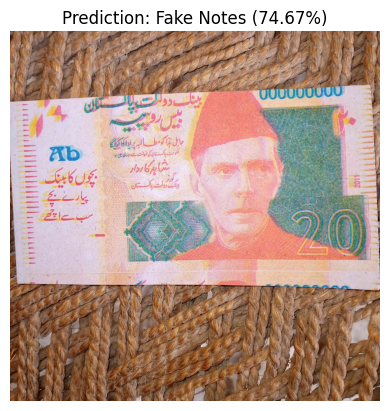

In [14]:
# Assuming these are your class names (can also get from training_data.class_names)
class_names = ['Fake Notes', 'Real Notes']

# Path to test image (from Google Drive or local)
image_path = "test-img's/fakes-Notes (120).jpg"  # Update as needed

label, conf = predict(image_path, class_names)

print(f"Predicted Class: {label} ({conf * 100:.2f}% confidence)")

# Call after prediction
show_prediction(image_path, label, conf)


Predicted Class: Real Notes (100.00% confidence)


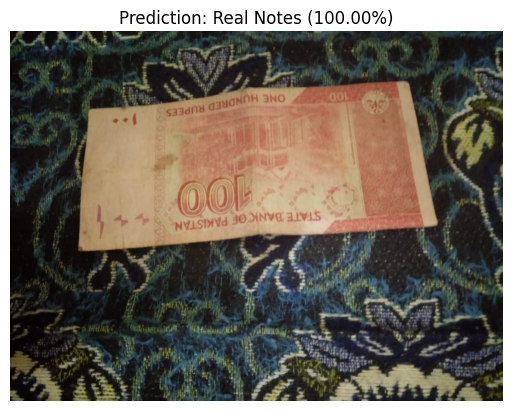

In [ ]:
image_path = "test-img's/Real-Notes (39).jpg"  # Update as needed

label, conf = predict(image_path, class_names)

print(f"Predicted Class: {label} ({conf * 100:.2f}% confidence)")

# Call after prediction
show_prediction(image_path, label, conf)


### Note Authenticity Verification - Prediction

In [17]:
import warnings
warnings.filterwarnings("ignore")

WARNING Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading models/best.onnx for ONNX Runtime inference...
Using ONNX Runtime 1.23.2 CPUExecutionProvider

image 1/1 d:\BS Computer Science\FYP-Currency Detection\pak-currency-vision-ai\test-img's\Real-Notes (100).jpg: 640x640 6 500s, 256.3ms
Speed: 18.4ms preprocess, 256.3ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)


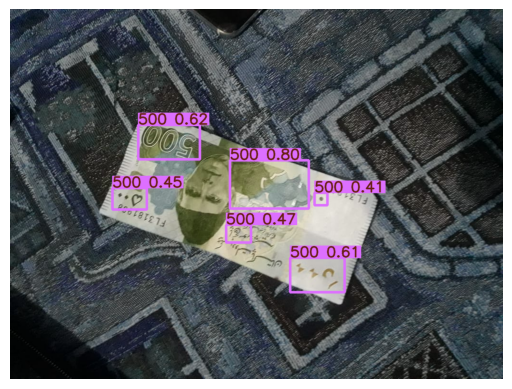

In [18]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO("models/best.onnx")
# Run prediction
results = model("test-img's/Real-Notes (100).jpg")

# Plot results (only works for single image input)
results[0].plot()  # draw boxes on image

# Show using matplotlib
plt.imshow(results[0].plot())  # returns an image array with bounding boxes
plt.axis('off')
plt.show()
